<a href="https://colab.research.google.com/github/PauForestal/master_bdds/blob/main/M2_AG1_GRUPO14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FUNDAMENTOS DE ESTADÍSTICA**
PADAWANS:
- PAULA VALLEJO VARGAS
- JOSE ARMANDO ALVARADO RUIZ

# **Introducción al cálculo de probabilidades**



**Entrega: M2_AG1_CORONAVIRUS**

# Descripción de la tarea


Tenéis un dataset (worlddometer_covid_ue.csv) con los datos a nivel europeo del Covid-19. En el momento del estudio, se detecta la siguiente situación:

Hay 6 países europeos con el mayor número de casos por Covid-19 que son Rusia, España, UK, Francia, Italia y Alemania con, aproximadamente, 250.000 casos.

Por lo que sabemos, se han adoptado algunas medidas similares de contención (confinamiento, mascarilla, geles, etc.) aunque no se han aplicado en las mismas fechas (por ejemplo, Italia comenzó 2 semanas antes que España y, en UK, postergaron el confinamiento en más de 15 días con respecto a España).

El número de habitantes por población es similar, quitando a Rusia que tiene el triple de personas que en España. Esto hace que descartemos a Rusia del análisis comparativo. En este punto, cabría la opción de plantearse añadir a Ucrania que tiene un número similar de habitantes que España.

Con los datos facilitados sobre el total de casos confirmados con Covid-19 (suponemos que con PCR) y sobre el total de fallecimientos acontecidos, te pedimos que halles:

- La probabilidad de sobrevivir en cualquiera de los seis países europeos seleccionados para el estudio.
- Si seleccionamos una de las personas fallecidas, ¿cuál es la probabilidad de que residiera en España? ¿Y en el resto de países?

Justifica y comenta los resultados obtenidos.

CONSIDERACIONES

Fuente de la información.

Se supondrá que los datos de fallecimiento se han contabilizado exactamente igual en los países seleccionados para el análisis.

Los datos son oficiales, con fecha 29-08-2020, pero esto no quiere decir que se puedan extraer conclusiones definitivas, mejor dicho, hay que considerar más variables de las que se tienen en cuenta en este análisis como, por ejemplo, la distribución de la edad en la población, la forma de considerar los fallecimientos por Covid-19 (si son con PCR o no todos los que figuran), las medidas adoptadas, etc.

Justifica adecuadamente tus respuestas.

# **Carga y análisis de la Data**

IMPORTACIÓN DE LIBRERÍAS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
import statsmodels.api as sm
import seaborn as sns
import math
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
pd.options.mode.chained_assignment = None
%matplotlib inline
import pandas.util.testing as tm

# Carga de Datos y visualización general

url = 'https://raw.githubusercontent.com/md-lorente/data/master/worlddometer_covid_ue.csv'
#df = pd.read_csv(url, sep=";", decimal=",")
df = pd.read_csv(url, sep=';',decimal = '.', thousands= ',')
df = df.infer_objects()
df.head(10)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Num,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Serious Critical,Total Cases per 1M pop,Deaths per 1M pop,Total Tests,Tests per 1M pop,Population
0,0,Europe,3543710,10493.0,207347.0,149.0,2063335.0,1273028.0,5619.0,NaN,NaN,NaN,NaN,NaN
1,1,Russia,990326,498.0,17093.0,68.0,806982.0,166251.0,23.0,6786.0,117.0,36400000.0,249409.0,145944843.0
2,2,Spain,455621,NaN,29011.0,NaN,NaN,NaN,751.0,9744.0,620.0,8517446.0,182161.0,46757783.0
3,3,UK,332752,NaN,41498.0,NaN,NaN,NaN,60.0,4897.0,611.0,16273209.0,239508.0,67944393.0
4,4,France,272530,NaN,30602.0,NaN,86177.0,155751.0,387.0,4174.0,469.0,6175223.0,94571.0,65297356.0
5,5,Italy,266853,NaN,35473.0,NaN,208224.0,23156.0,79.0,4415.0,587.0,8509618.0,140778.0,60447003.0
6,6,Germany,242825,NaN,9363.0,NaN,217484.0,15978.0,245.0,2897.0,112.0,11208091.0,133703.0,83828051.0
7,7,Ukraine,119074,2096.0,2527.0,35.0,56734.0,59813.0,177.0,2725.0,58.0,1536171.0,35161.0,43689434.0
8,8,Romania,86785,952.0,3578.0,39.0,37665.0,45542.0,492.0,4516.0,186.0,1795633.0,93445.0,19216003.0
9,9,Belgium,84599,647.0,9891.0,5.0,18403.0,56305.0,72.0,7294.0,853.0,2261043.0,194953.0,11597901.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Num                     49 non-null     int64  
 1   Country                 49 non-null     object 
 2   Total Cases             49 non-null     int64  
 3   New Cases               17 non-null     float64
 4   Total Deaths            46 non-null     float64
 5   New Deaths              7 non-null      float64
 6   Total Recovered         45 non-null     float64
 7   Active Cases            45 non-null     float64
 8   Serious Critical        37 non-null     float64
 9   Total Cases per 1M pop  48 non-null     float64
 10  Deaths per 1M pop       45 non-null     float64
 11  Total Tests             47 non-null     float64
 12  Tests per 1M pop        47 non-null     float64
 13  Population              48 non-null     float64
dtypes: float64(11), int64(2), object(1)
memory u

In [4]:
# Para evaluar qué porcentaje de los datos son Null
pd.set_option('display.float_format', '{:.2%}'.format)

null_values = df.isnull().sum()/len(df)
null_values_df = pd.DataFrame({'null_values(%)': null_values}).sort_values('null_values(%)', ascending=False)
null_values_df

,null_values(%)
New Deaths,85.71%
New Cases,65.31%
Serious Critical,24.49%
Total Recovered,8.16%
Active Cases,8.16%
Deaths per 1M pop,8.16%
Total Deaths,6.12%
Total Tests,4.08%
Tests per 1M pop,4.08%
Total Cases per 1M pop,2.04%


In [5]:
#pd.reset_option('display.float_format')
pd.set_option('display.float_format', '{:.5f}'.format)

In [6]:
df.describe(include='float64')

,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Serious Critical,Total Cases per 1M pop,Deaths per 1M pop,Total Tests,Tests per 1M pop,Population
count,17.00000,46.00000,7.00000,45.00000,45.00000,37.00000,48.00000,45.00000,47.00000,47.00000,48.00000
mean,970.82353,9015.08696,42.57143,85491.95556,42055.46667,242.18919,4847.16667,222.06667,2430235.31915,273175.08511,15577203.85417
std,2508.99973,31482.55956,53.09067,326648.50633,190894.09075,925.21237,4107.93665,262.82576,6009203.91804,430416.05624,27926035.25564
min,10.00000,1.00000,1.00000,12.00000,-639.00000,1.00000,617.00000,6.00000,900.00000,849.00000,801.00000
25%,31.00000,87.75000,3.00000,714.00000,196.00000,4.00000,2175.50000,49.00000,142229.50000,65774.00000,627957.50000
50%,262.00000,600.50000,35.00000,3804.00000,1565.00000,23.00000,3768.50000,108.00000,633773.00000,115619.00000,5444106.00000
75%,631.00000,2403.50000,53.50000,25139.00000,6132.00000,72.00000,6306.75000,282.00000,1526649.50000,215743.50000,10488932.75000
max,10493.00000,207347.00000,149.00000,2063335.00000,1273028.00000,5619.00000,20917.00000,1237.00000,36400000.00000,1899926.00000,145944843.00000


El dataset cuenta con un total de 12 variables y 49 observaciones. 

Análisis de Variables:

- 'Num': Es el identificador del dataset, corresponde a un número único y correlativo y es una variable Cuantitativa discreta. En función del análisis de datos es una Variable una Variable Analítica.

- 'Country': Corresponde al país en análisis. Esta es una variable Cualitativa Nominal. En función del análisis de datos es una Variable Categórica.

- 'Total Cases': Corresponde al recuento acumulado total reportado de casos detectados. Es una variable Cuantitativa discreta. En función del análisis de datos es una Variable Analítica.

- 'New Cases': Corresponde a la cantidad de casos nuevos registrados en el país en cuestión en el día del análisis. Es una variable Cuantitativa discreta. En función del análisis de datos es una Variable Analítica.

- 'Total Deaths': Corresponde al número acumulado de muertes entre los casos detectados. Es una variable Cuantitativa discreta. En función del análisis de datos es una Variable Analítica.

- 'New Deaths': Corresponde a la cantidad de nuevos fallecidos registrados en el país en cuestión en el día del análisis. Es una variable Cuantitativa discreta. En función del análisis de datos es una Variable Analítica.

- 'Total Recovered': Corresponde al total de personas recuperadas en el país en cuestión hasta la fecha en anáisis. Es una variable Cuantitativa discreta. En función del análisis de datos es una Variable Analítica.

- 'Active Cases':  ('Total Cases') - ('Total Deaths') - ('Total Recovered'). Corresponde al número actual de personas detectadas y confirmadas infectadas con el virus. Es una variable Cuantitativa discreta. En función del análisis de datos es una Variable Analítica.

- 'Serious Critical': Esta variable corresponde a los casos UCI registrados a la fecha de recolección. Es una variable Cuantitativa discreta. En función del análisis de datos es una Variable Analítica.

- 'Total Cases per 1M pop': Corresponde a los casos por millón de habitantes (es una medida relativa que permite comparar valores entre países). Es una variable Cuantitativa discreta. En función del análisis de datos es una Variable Analítica.

- 'Deaths per 1M pop': Corresponde a los fallecimientos por millón de habitantes. Es una variable Cuantitativa discreta. En función del análisis de datos es una Variable Analítica.

- 'Total Tests': Corresponde al total acumulado de tests registrados e informados. Es una variable Cuantitativa discreta. En función del análisis de datos es una Variable Analítica.

- 'Tests per 1M pop': Corresponde a la cantidad de test registrados por millon de habitantes. Es una variable Cuantitativa discreta. En función del análisis de datos es una Variable Analítica.

- 'Population': Corresponde a la población total del país. Es una variable Cuantitativa discreta. En función del análisis de datos es una Variable Analítica.

Al realizar un análisis de missing values, podemos determinar que para aquellas variables "New Deaths" y "New Cases" hay un alto porcentaje de datos faltantes (85,7% y 65,3% respectivamente). Esto se explica ya que la colección de los datos corresponde a un día específico por lo que es muy probable que existan países en que no se informaron nuevos casos o nuevos fallecidos.

# **Selección Universo**

Para efectos de este estudido, el universo estará formado por los siguientes 6 países: 

- España
- UK
- Francia
- Italia
- Alemania
- Ucrania.

In [2]:
# Seleccionamos a los 6 paises que serán nuestro Universo
df2 = df.loc[2:7]

In [3]:
df2

,Num,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Serious Critical,Total Cases per 1M pop,Deaths per 1M pop,Total Tests,Tests per 1M pop,Population
2,2,Spain,455621,NaN,29011.0,NaN,NaN,NaN,751.0,9744.0,620.0,8517446.0,182161.0,46757783.0
3,3,UK,332752,NaN,41498.0,NaN,NaN,NaN,60.0,4897.0,611.0,16273209.0,239508.0,67944393.0
4,4,France,272530,NaN,30602.0,NaN,86177.0,155751.0,387.0,4174.0,469.0,6175223.0,94571.0,65297356.0
5,5,Italy,266853,NaN,35473.0,NaN,208224.0,23156.0,79.0,4415.0,587.0,8509618.0,140778.0,60447003.0
6,6,Germany,242825,NaN,9363.0,NaN,217484.0,15978.0,245.0,2897.0,112.0,11208091.0,133703.0,83828051.0
7,7,Ukraine,119074,2096.0,2527.0,35.0,56734.0,59813.0,177.0,2725.0,58.0,1536171.0,35161.0,43689434.0


# **Probabilidad de Laplace**

**Pregunta 1:**

La probabilidad de sobrevivir en cualquiera de los seis países europeos seleccionados para el estudio.

Considerando los datos disponibles, consideraremos que la Probabilidad de sobrevivir esta dada por:

        1 - Probabilidad de Morir

donde Probabilidad de Morir es *total_deaths/total_cases*, por lo tanto:

        Probabilidad de sobrevivir = 1 - (total_deaths/total_cases)

En este caso, estamos utilizando la Probabilidad a traves de Laplace, ya que bastaría con determinar la proporción entre el número de casos favorables de un suceso y el número de resultados posibles relativos al experimento, donde los casos favorables serían el total de muertes y el número posible es el total de casos, basado en los datos facilitados sobre el total de casos confirmados con Covid-19 (suponemos que con PCR) y sobre el total de fallecimientos acontecidos.

In [8]:
# Realizamos copia del dataset con solo las variables que nos interesan para este analisis

df_universo = df2[['Country','Total Cases','Total Deaths']]

def laplace_pais(country,df):
  prob_morir = df.loc[df['Country']==country]['Total Deaths'] / df.loc[df['Country']==country]['Total Cases']
  prob_sobrevivir = 1 - prob_morir.values[0]
  return round(prob_sobrevivir,3)


print("La Probabilidad de Sobrevivir en España es de:", laplace_pais('Spain', df_universo))
print("La Probabilidad de Sobrevivir en Reino Unido es de:", laplace_pais('UK', df_universo))
print("La Probabilidad de Sobrevivir en Francia es de:", laplace_pais('France', df_universo))
print("La Probabilidad de Sobrevivir en Italia es de:", laplace_pais('Italy', df_universo))
print("La Probabilidad de Sobrevivir en Alemania es de:", laplace_pais('Germany', df_universo))
print("La Probabilidad de Sobrevivir en Ucrania es de:", laplace_pais('Ukraine', df_universo))


La Probabilidad de Sobrevivir en España es de: 0.936
La Probabilidad de Sobrevivir en Reino Unido es de: 0.875
La Probabilidad de Sobrevivir en Francia es de: 0.888
La Probabilidad de Sobrevivir en Italia es de: 0.867
La Probabilidad de Sobrevivir en Alemania es de: 0.961
La Probabilidad de Sobrevivir en Ucrania es de: 0.979


Analisis de Resultados

Podemos ver que la mayor probabilidad de sobrevivir al Coronavirus dentro de nuestro universo de 6 países seleccionados esta en Ucrania con un 97,9%, mientras que la menor probabilidad la tiene es Italia con un 86,7%.

A continuación un cuadro comparativo de la probabilidad de sobrevivir en nuestro universo:

In [9]:
pd.set_option('display.float_format', '{:.3f}'.format)

df_universo['Probabilidad sobrevivir'] = 1 - (df_universo['Total Deaths'] / df_universo['Total Cases'])
df_universo[['Country', 'Probabilidad sobrevivir']].sort_values(by='Probabilidad sobrevivir', ascending=False)

,Country,Probabilidad sobrevivir
7,Ukraine,0.979
6,Germany,0.961
2,Spain,0.936
4,France,0.888
3,UK,0.875
5,Italy,0.867


In [10]:
pd.reset_option('display.float_format')

# **Teorema de la Probabilidad Total y Teorema de Bayes**

Para responder la pregunta 2, utilizaremos el Teorema de Probabilidad Total y Teorema de Bayes.


Pregunta 2:

Si seleccionamos una de las personas fallecidas, ¿cuál es la probabilidad de que residiera en España? ¿Y en el resto de países?

In [11]:
# Total de Casos universo, donde Porcentaje Casos es el total de casos de cada país dividido el total de casos del Universo.

total_casos_universo = df_universo['Total Cases'].sum()
df_universo['Porcentaje Casos'] = df_universo['Total Cases'] / total_casos_universo

# Aprovechamos de crear una nueva columna probabilidad de morir por país para los siguientes analisis.

df_universo['Probabilidad morir'] = df_universo['Total Deaths'] / df_universo['Total Cases']

In [12]:
df_universo

,Country,Total Cases,Total Deaths,Probabilidad sobrevivir,Porcentaje Casos,Probabilidad morir
2,Spain,455621,29011.0,0.936326,0.269653,0.063674
3,UK,332752,41498.0,0.875289,0.196935,0.124711
4,France,272530,30602.0,0.887711,0.161293,0.112289
5,Italy,266853,35473.0,0.867069,0.157933,0.132931
6,Germany,242825,9363.0,0.961441,0.143713,0.038559
7,Ukraine,119074,2527.0,0.978778,0.070472,0.021222


Esto refleja que el 26,9% de los casos de nuestro universo estan en España, mientras que en UK tenemos 19,6% de los casos, mientras que en Ucrania solo corresponde al 7% de los casos.

Para calcular la probabilidad de que una persona muera en el universo de seis países P(M), esta se puede calcular por la propiedad de la probabilidad total, esto es:

$$ 
P(M) = \sum_{j=1}^6 P(A_{j}) P(M|A_{j}) =  P(A_{1}) \cdot P(M|A_{1}) + P(A_{2}) \cdot P(M|A_{2}) + \ldots + P(A_{6}) \cdot P(M|A_{6})
\\  $$

Donde A es cada uno de los 6 países.

In [ ]:
def probabilidad_total(df):
  prob_total = 0
  for index, row in df.iterrows():
    prob_total = prob_total + row['Porcentaje Casos']*(row['Probabilidad morir'])
  return prob_total

probabilidad_total = probabilidad_total(df_universo)

print("La probabilidad total en nuestro universo es de :", round(probabilidad_total,3))

La probabilidad total en nuestro universo es de :  0.088


La probabilidad total se refiere principalmente a que existe un 8,8% de probabilidades de fallecer dentro de nuestro universo que corresponde a los seís países.

Ahora podemos utilizar el Teorema de Bayes para determinar la probabilidad de que esa persona muerta resida en un país especifico, utilizando esta formula:

$$ 
P(País|M) = \frac{ P(país) \cdot P(M|país) }{ Probabilidad   total }
\\ \\
$$

In [ ]:
def teorema_bayes(country, df, prob_total):
  numerador = df.loc[df['Country']==country]['Porcentaje Casos']*(df.loc[df['Country']==country]['Probabilidad morir'])
  bayes = numerador/prob_total
  return round(bayes.values[0],4)

print("Probabilidad de que persona fallecida resida en España es:", teorema_bayes('Spain', df_universo, probabilidad_total))
print("Probabilidad de que persona fallecida resida en Reino Unido es:", teorema_bayes('UK', df_universo, probabilidad_total))
print("Probabilidad de que persona fallecida resida en Francia es:", teorema_bayes('France', df_universo, probabilidad_total))
print("Probabilidad de que persona fallecida resida en Italia es:", teorema_bayes('Italy', df_universo, probabilidad_total))
print("Probabilidad de que persona fallecida resida en Alemania es:", teorema_bayes('Germany', df_universo, probabilidad_total))
print("Probabilidad de que persona fallecida resida en Ucrania es:", teorema_bayes('Ukraine', df_universo, probabilidad_total))


Probabilidad de que persona fallecida resida en España es:  0.1954
Probabilidad de que persona fallecida resida en Reino Unido es:  0.2795
Probabilidad de que persona fallecida resida en Francia es:  0.2061
Probabilidad de que persona fallecida resida en Italia es:  0.2389
Probabilidad de que persona fallecida resida en Alemania es:  0.0631
Probabilidad de que persona fallecida resida en Ucrania es:  0.017


# Árbol de decisión

Otra forma de obtener el Teorema de Bayes es a través del Árbol de decisión, que es una técnica muy sencilla que, además, se usa para tomas de decisión.



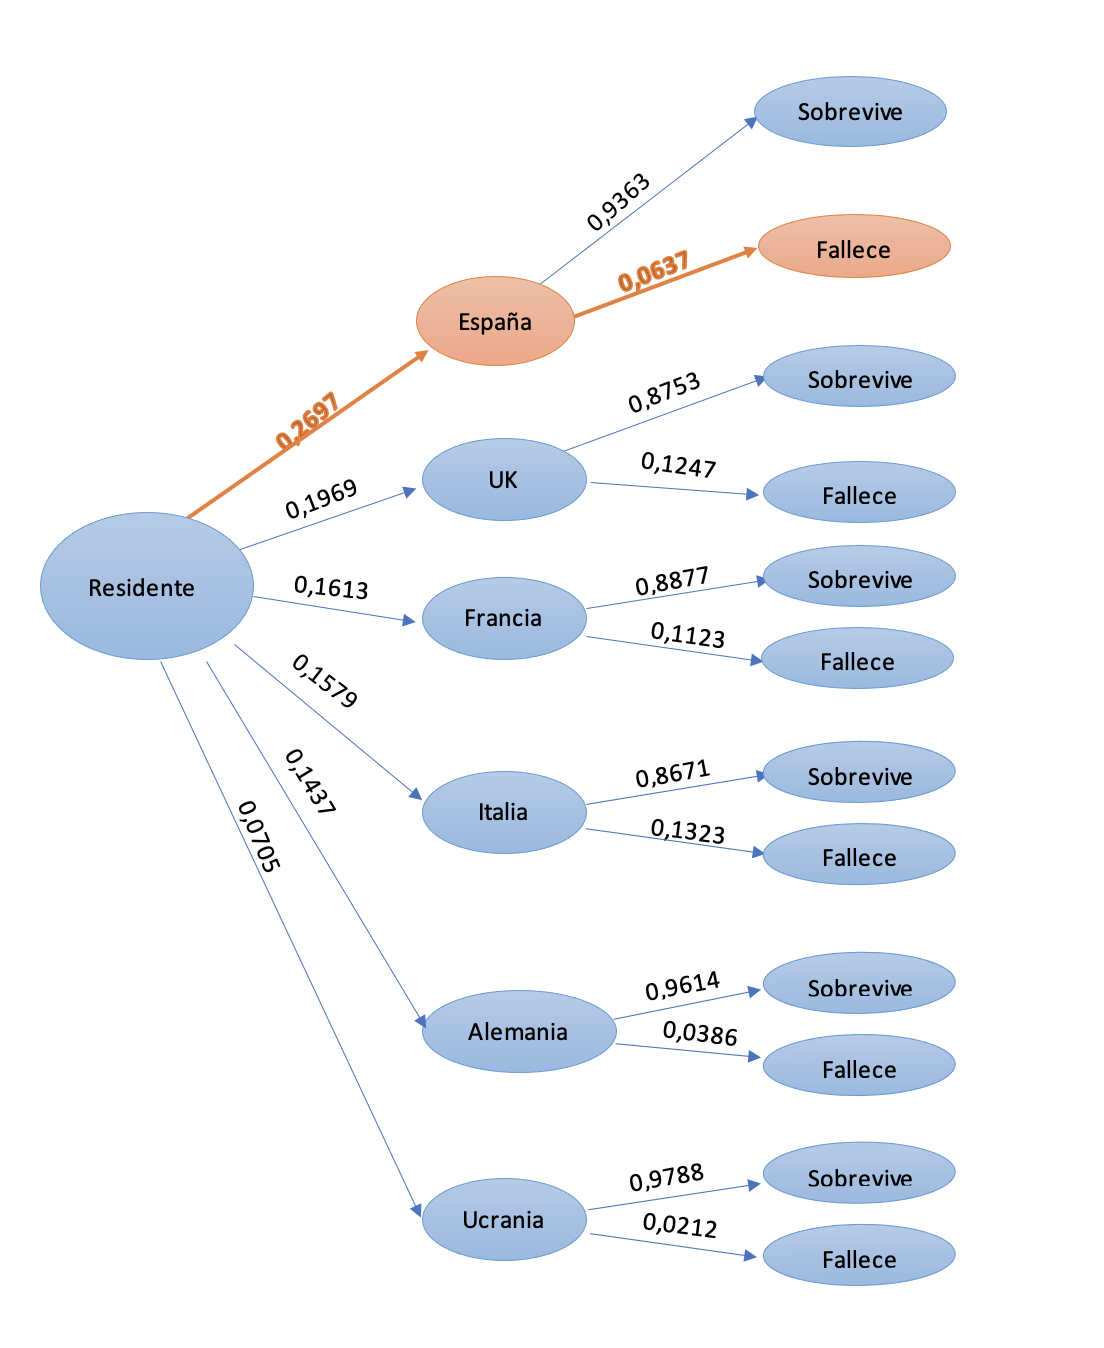